# Clean & EDA 


### Import 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from helper import rolling_outliers_zscore

In [44]:
# Optional: nice plot styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Read in data

In [58]:

df = pd.read_csv("garmin_summary.csv")

### Sort by calendar date

In [59]:
df['calendarDate'] = pd.to_datetime(df['calendarDate'])
df = df.sort_values('calendarDate')

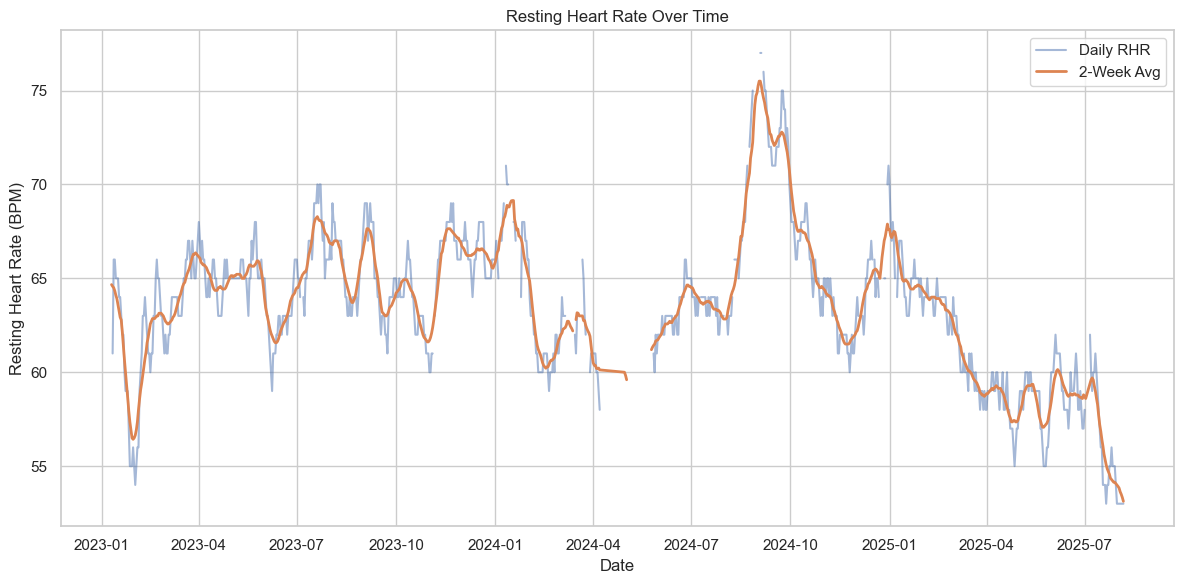

In [60]:
plt.plot(df['calendarDate'], df['restingHeartRate'], label='Daily RHR', alpha=0.5)
plt.plot(df['calendarDate'], df['restingHeartRate'].rolling(window=14, min_periods=5, center=True).mean(), label='2-Week Avg', linewidth=2)
plt.title('Resting Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Resting Heart Rate (BPM)')
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
print("Resting Heart Rate Summary:")
print(df['restingHeartRate'].describe())

Resting Heart Rate Summary:
count    842.000000
mean      63.542755
std        3.916331
min       53.000000
25%       61.000000
50%       64.000000
75%       66.000000
max       77.000000
Name: restingHeartRate, dtype: float64


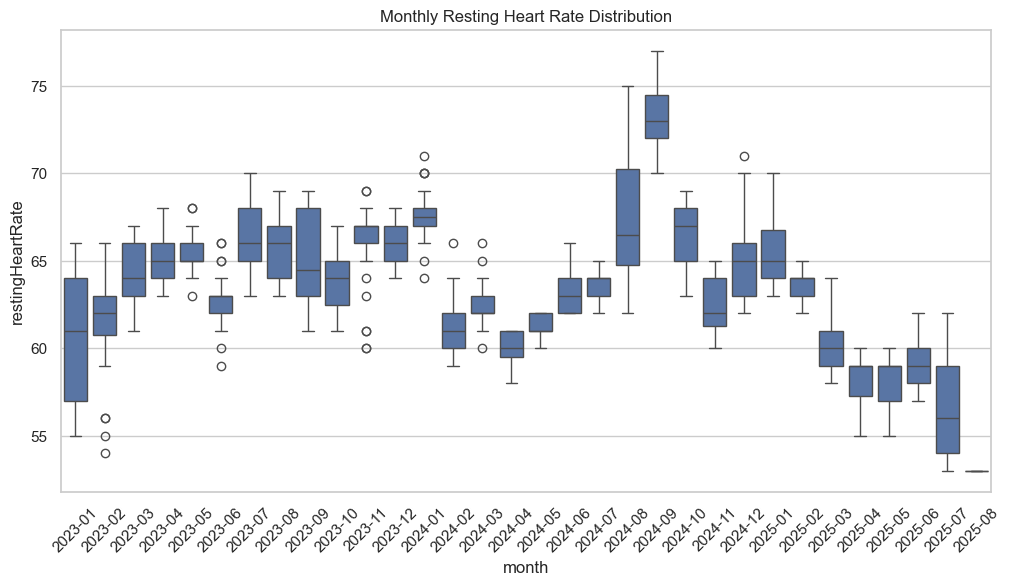

In [62]:
df['month'] = df['calendarDate'].dt.to_period('M')
sns.boxplot(x=df['month'].astype(str), y=df['restingHeartRate'])
plt.xticks(rotation=45)
plt.title('Monthly Resting Heart Rate Distribution')
plt.show()

In [63]:
outlier_mask, z_scores = rolling_outliers_zscore(df['restingHeartRate'], debug=True)

df['rhr_outlier'] = outlier_mask
df['rhr_zscore'] = z_scores


Total outliers found: 6
restingHeartRate
False    912
True       6
Name: count, dtype: int64


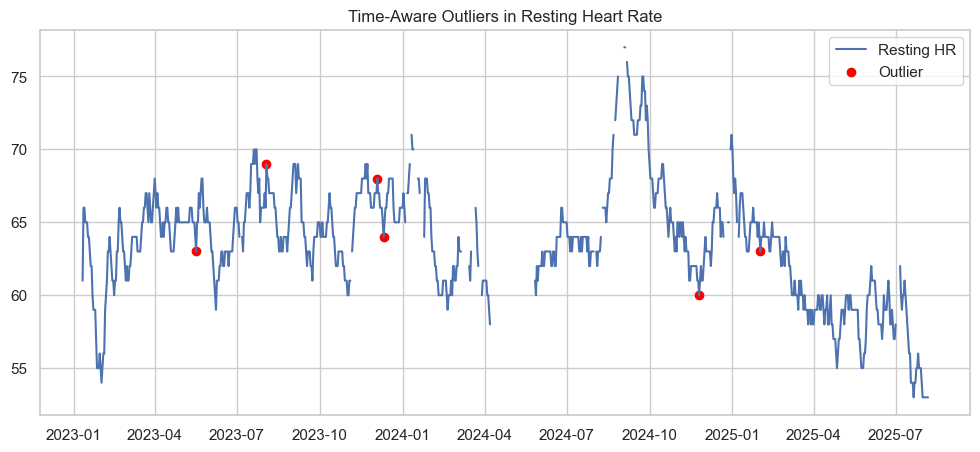

In [64]:
plt.figure(figsize=(12, 5))
plt.plot(df['calendarDate'], df['restingHeartRate'], label='Resting HR')
plt.scatter(df.loc[df['rhr_outlier'], 'calendarDate'],
            df.loc[df['rhr_outlier'], 'restingHeartRate'],
            color='red', label='Outlier')
plt.title('Time-Aware Outliers in Resting Heart Rate')
plt.legend()
plt.show()


In [65]:
outlier_count = df['rhr_outlier'].sum()
print(f"Total RHR outliers: {outlier_count}")


Total RHR outliers: 6


In [66]:
df['calendarDate'] = pd.to_datetime(df['calendarDate'])  # or whatever your date column is named
df.set_index('calendarDate', inplace=True)


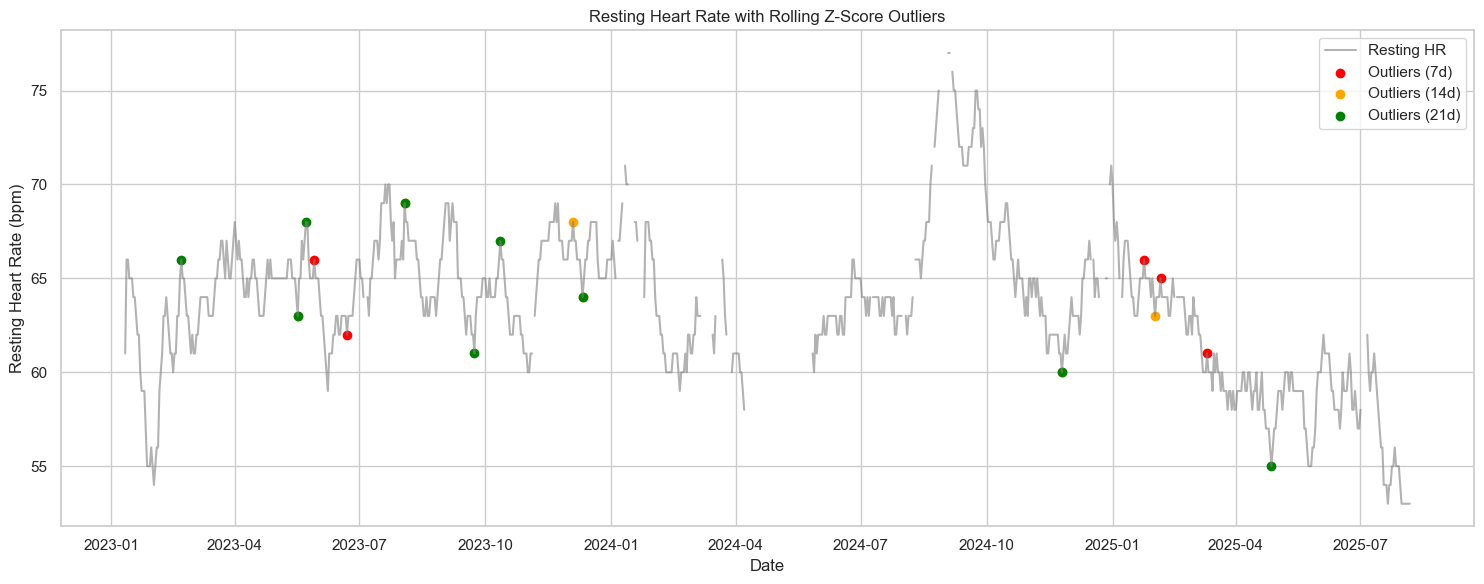

In [67]:

import matplotlib.pyplot as plt

# Assuming df has a datetime index and a 'restingHeartRate' column
windows = [7, 14, 21]

for w in windows:
    rolling_mean = df['restingHeartRate'].rolling(window=w, center=True).mean()
    rolling_std = df['restingHeartRate'].rolling(window=w, center=True).std()
    z_scores = (df['restingHeartRate'] - rolling_mean) / rolling_std
    df[f'zscore_{w}d'] = z_scores

threshold = 2
for w in windows:
    df[f'outlier_{w}d'] = df[f'zscore_{w}d'].abs() > threshold
    
plt.figure(figsize=(15, 6))

plt.plot(df.index, df['restingHeartRate'], label='Resting HR', color='gray', alpha=0.6)

colors = ['red', 'orange', 'green']
for w, color in zip(windows, colors):
    outliers = df[df[f'outlier_{w}d']]
    plt.scatter(outliers.index, outliers['restingHeartRate'], label=f'Outliers ({w}d)', color=color)

plt.title('Resting Heart Rate with Rolling Z-Score Outliers')
plt.xlabel('Date')
plt.ylabel('Resting Heart Rate (bpm)')
plt.legend()
plt.tight_layout()
plt.show()


In [68]:
# Cleaned data (no outliers)
clean_df = df[~df['rhr_outlier']]  # Assuming you've already created this mask




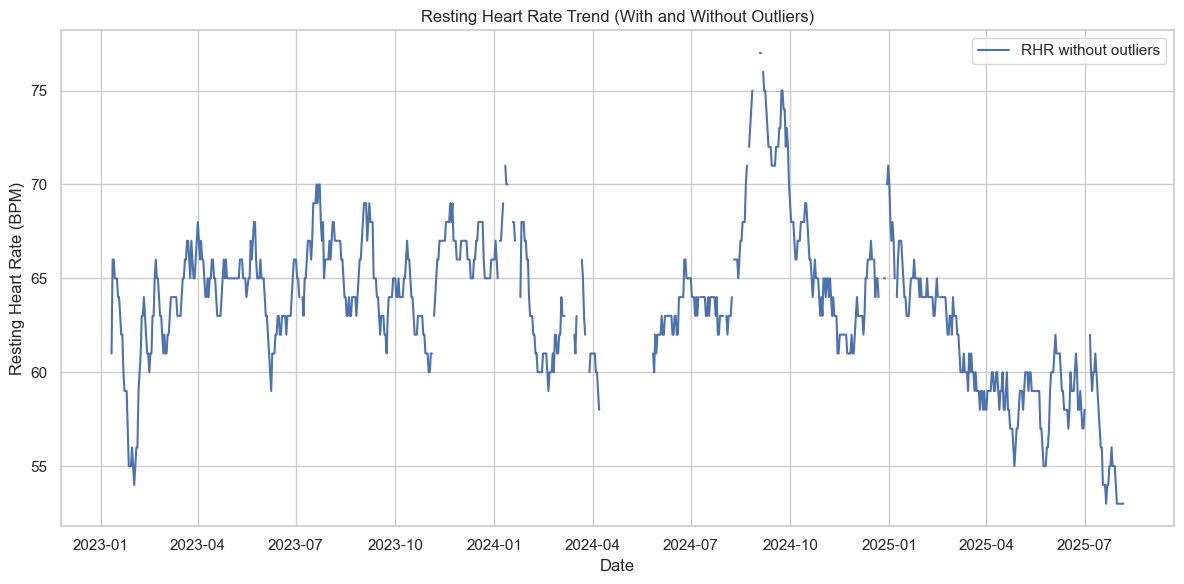

In [69]:
plt.plot(clean_df.index, clean_df['restingHeartRate'], label='RHR without outliers')
plt.xlabel('Date')
plt.ylabel('Resting Heart Rate (BPM)')
plt.title('Resting Heart Rate Trend (With and Without Outliers)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
